# **Описание проекта: исследование интернет-магазина «Подарочек»**

В качестве тестового задания исследуйте данные онлайн-магазина подарков.

Магазин зачастую отправляет товары по почте, работает как с оптовыми, так и с розничными покупателями. 

Вы должны применить Python для анализа данных и показать, что можете самостоятельно решить задачу по исследованию данных, сегментации клиентов и проверке статистических гипотез.

## Описание данных

__Основной датасет (df)__
- entry_date — дата записи;
- order_id — идентификационный номер заказа;
- customer_id — идентификационный номер клиента;
- quantity — количество;
- price — цена;
- name_clust — автоматически присвоенная группа записи на основе названия;
- entry_id — идентификационный номер записи;
- country_id — идентификационный номер страны.

__Текстовое описание записей (df_text)__
- entry_id — идентификационный номер записи;
- entry — запись.

Датасеты содержит данные, которые несут в себе информацию о клиентах онлайн магазина Подарочек
- основной датасет содержит информацию о заказах, включая дату, идентификаторы заказов и клиентов, количество товаров, их цену

- текстовый датасет дополняет основной датасет описаниями записей

__Цель работы__

- Необходимо исследовать данные онлайн-магазина подарков с целью анализа поведения клиентов, сегментации их на основе различных характеристик и проверки статистических гипотез. 
- Данный проект  поможет  как понять исследуемых клиентов,так и  улучшить взаимодействие компании  с ними, что приведет к повышению эффективность бизнесса компании.

__План работы:__ <a name="chapter0"></a>
- [Шаг 1. Получение, осмотр и объединение данных](#chapter1)
  - Загрузка данных из csv-файлов в датафреймы.
  - Изучить общую информацию о датафреймах.
  -  Проверить наличие пропусков и принять решение о их заполнении.
  - Проверить наличие дубликатов и принять решение о их удалении.
  - Привести типы данных в каждом столбце к нужным форматам.
  -  Проверить соответствие идентификационных номеров.
  -  Объединить информацию из всех датафреймов в один.
-  [Шаг 2. Предобработка и начало исследовательского анализа](#chapter2)
   -  Найдите выбросы и аномальные значения в столбцах price и quantity, рассчитайте сумму стоимости каждой товарной позиции в датасете, примите и реализуйте решение о сохранении или отбрасывании подозрительных данных.
   -  Изучите столбцы order_id, customer_id, name_clust, entry_id и country_id.
   -  Изучите полноту данных, анализируя время записей. Посчитайте по месяцам количество дней, в которых не было продаж. Выберите период для анализа, содержащий основную часть данных, и далее работайте только с актуальными данными.

- [Шаг 3. Расчёт метрик](#chapter3)
    - Оцените по часам и дням недели количество заказов и количество уникальных покупателей. Постройте графики и сделайте вывод о наличии цикличности в покупательской активности.
    - Рассчитайте по месяцам среднюю выручку с клиента в день и количество уникальных покупателей. Сделайте вывод о наличии или отсутствии сезонности, если это возможно.
    - Рассчитайте стики-фактор за второй и третий квартал 2019 года.
    - Составьте профиль каждого клиента, включите в профиль количество заказов, дату первого и последнего заказа, общую сумму всех заказов, среднюю цену заказа, а также другие показатели по вашему выбору.
    - Разделите клиентов на возвратных и нет по признаку наличия повторных покупок, для каждой из групп на основе профилей клиентов (когда это возможно) рассчитайте средние показатели и оцените их.
- [Шаг 4. Проведение RFM-сегментацию клиентов](#chapter4)
    - разделите клиентов на группы по методике RFM;
    - оцените получившиеся группы, найдите похожие и различающиеся;
    - сформулируйте рекомендации для бизнеса по взаимодействию с сегментами, сопроводив их подходящими графиками и таблицами.
- [Шаг 5.Проверка статистических гипотез](#chapter5)
    - Сравните доли возвратных и невозвратных клиентов за второй и третий квартал 2019 года при помощи подходящего статистического теста.
    - Сравните средние чеки в странах с country_id, равному 3, 6 и 24. На основе статистических тестов сделайте вывод о том, отличаются ли средние чеки в этих странах или нет.
    - Сформулируйте собственную гипотезу и проверьте её.
- [Шаг 6. Выводы по проекту](#chapter6)
    - Опишите полученные результаты и зафиксируйте итоговый вывод проведённого исследования.

---

# Шаг 3. Расчёт метрик <a name="chapter3"></a>

- работаем с датафреймом analysis_period

1. Оцените по часам и дням недели количество заказов и количество уникальных покупателей. Постройте графики и сделайте вывод о наличии цикличности в покупательской активности.

In [136]:
# Создание столбцов для часов и дней недели с использованием .loc
# Создание столбцов для часов и дней недели
analysis_period['hour'] = analysis_period['entry_date'].dt.hour
analysis_period['day_of_week'] = analysis_period['entry_date'].dt.dayofweek

analysis_period.head()

/tmp/ipykernel_31/559917193.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_period['hour'] = analysis_period['entry_date'].dt.hour
/tmp/ipykernel_31/559917193.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_period['day_of_week'] = analysis_period['entry_date'].dt.dayofweek


,entry_date,order_id,customer_id,quantity,price,name_clust,entry_id,country_id,entry,total_cost,year,month,hour,day_of_week
0,2018-12-01 08:26:00,3031,2150,6,339,740,891,28,белый металлический фонарь,2034,2018,12,8,5
1,2018-12-01 08:26:00,3031,2150,8,275,132,1596,28,кремовая вешалка в форме сердечек Купидона,2200,2018,12,8,5
2,2018-12-01 08:26:00,3031,2150,6,339,197,166,28,Вязаная грелка с флагом Союза,2034,2018,12,8,5
3,2018-12-01 08:26:00,3031,2150,2,765,767,1810,28,набор 7 скворечников для бабушек,1530,2018,12,8,5
4,2018-12-01 08:26:00,3031,2150,6,425,383,2585,28,стеклянный матовый держатель в форме звезды,2550,2018,12,8,5


In [137]:
# Создание столбцов для часов и дней недели с использованием .loc
analysis_period.loc[:, 'hour'] = analysis_period['entry_date'].dt.hour
analysis_period.loc[:, 'day_of_week'] = analysis_period['entry_date'].dt.dayofweek

# Проверка первых строк данных после преобразования
analysis_period.head()

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,entry_date,order_id,customer_id,quantity,price,name_clust,entry_id,country_id,entry,total_cost,year,month,hour,day_of_week
0,2018-12-01 08:26:00,3031,2150,6,339,740,891,28,белый металлический фонарь,2034,2018,12,8,5
1,2018-12-01 08:26:00,3031,2150,8,275,132,1596,28,кремовая вешалка в форме сердечек Купидона,2200,2018,12,8,5
2,2018-12-01 08:26:00,3031,2150,6,339,197,166,28,Вязаная грелка с флагом Союза,2034,2018,12,8,5
3,2018-12-01 08:26:00,3031,2150,2,765,767,1810,28,набор 7 скворечников для бабушек,1530,2018,12,8,5
4,2018-12-01 08:26:00,3031,2150,6,425,383,2585,28,стеклянный матовый держатель в форме звезды,2550,2018,12,8,5


In [138]:
# Подсчет количества заказов по часам
orders_by_hour = analysis_period.groupby('hour').size().reset_index(name='order_count')

# Подсчет количества уникальных покупателей по часам
unique_customers_by_hour = analysis_period.groupby('hour')['customer_id'].nunique().reset_index(name='unique_customers')

# Объединение данных
hourly_data = pd.merge(orders_by_hour, unique_customers_by_hour, on='hour')

print(hourly_data)

    hour  order_count  unique_customers
0      6            1                 1
1      7           66                16
2      8         3691               355
3      9        15848               762
4     10        21755              1086
5     11        28624              1134
6     12        39190              1448
7     13        37159              1402
8     14        34588              1242
9     15        42284              1106
10    16        28912               630
11    17        14409               354
12    18         4410               112
13    19         1703                78
14    20          447                14


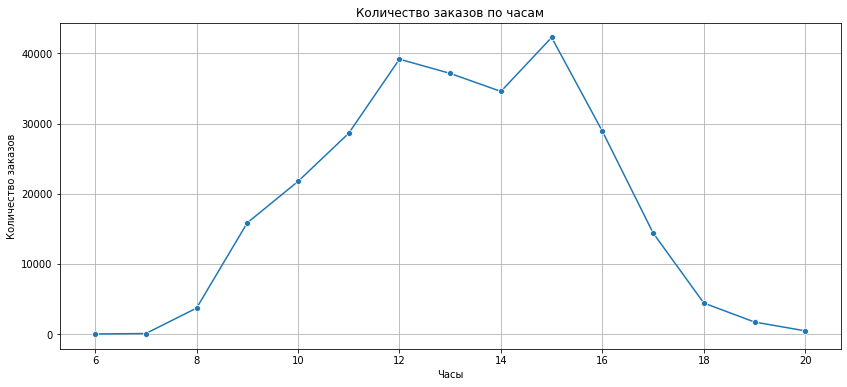

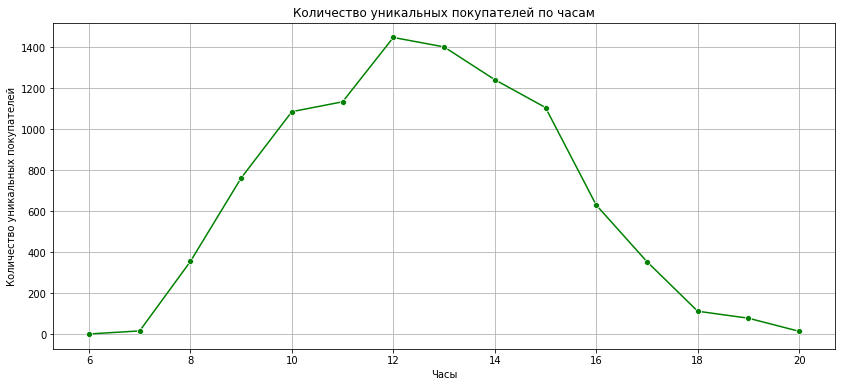

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

# График количества заказов по часам
plt.figure(figsize=(14, 6))
sns.lineplot(data=hourly_data, x='hour', y='order_count', marker='o')
plt.title('Количество заказов по часам')
plt.xlabel('Часы')
plt.ylabel('Количество заказов')
plt.grid(True)
plt.show()

# График количества уникальных покупателей по часам
plt.figure(figsize=(14, 6))
sns.lineplot(data=hourly_data, x='hour', y='unique_customers', marker='o', color='green')
plt.title('Количество уникальных покупателей по часам')
plt.xlabel('Часы')
plt.ylabel('Количество уникальных покупателей')
plt.grid(True)
plt.show()

___Выводы по количеству заказоыв по часам___
- Пиковые часы: Максимальное количество заказов  с 10:00 до 15:00, с наивысшим пиком в 12:00.
- Минимальные часы: Наименьшая активность клиентов наблюдается ранним утром (6:00 - 7:00) и поздним вечером (18:00 - 20:00).

___Выводы по количеству уникальных покупателей  по часам___
- Пиковые часы: Максимальное количество уникальных покупателей также наблюдается с 10:00 до 15:00, с пиком в 12:00.
- Минимальные часы: Минимальная активность уникальных покупателей утром и вечером схожа с активностью заказов.

In [140]:
# Подсчет количества заказов по дням недели
orders_by_day = analysis_period.groupby('day_of_week').size().reset_index(name='order_count')

# Подсчет количества уникальных покупателей по дням недели
unique_customers_by_day = analysis_period.groupby('day_of_week')['customer_id'].nunique().reset_index(name='unique_customers')

# Объединение данных
daily_data = pd.merge(orders_by_day, unique_customers_by_day, on='day_of_week')

print(daily_data)

   day_of_week  order_count  unique_customers
0            0        40815              1357
1            2        34948              1130
2            3        47792              1412
3            4        52145              1501
4            5        48301              1570
5            6        49086              1753


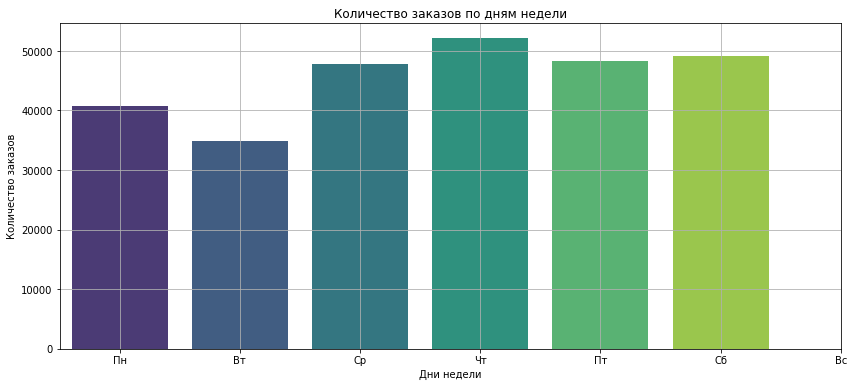

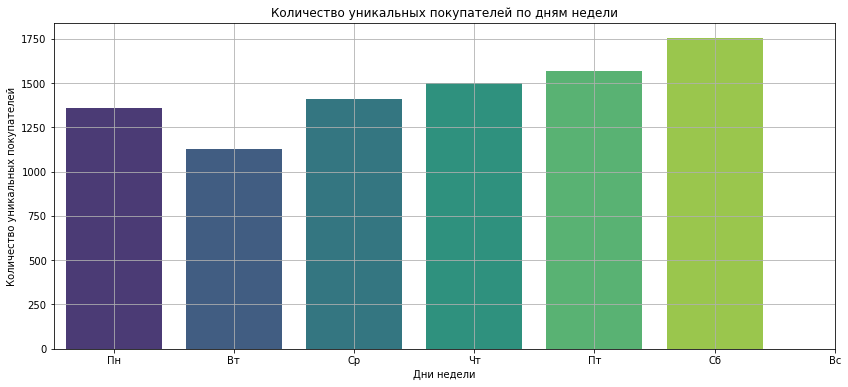

In [141]:
# График количества заказов по дням недели
plt.figure(figsize=(14, 6))
sns.barplot(data=daily_data, x='day_of_week', y='order_count', palette='viridis')
plt.title('Количество заказов по дням недели')
plt.xlabel('Дни недели')
plt.ylabel('Количество заказов')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])
plt.grid(True)
plt.show()

# График количества уникальных покупателей по дням недели
plt.figure(figsize=(14, 6))
sns.barplot(data=daily_data, x='day_of_week', y='unique_customers', palette='viridis')
plt.title('Количество уникальных покупателей по дням недели')
plt.xlabel('Дни недели')
plt.ylabel('Количество уникальных покупателей')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])
plt.grid(True)
plt.show()

___Выводы по количеству заказоыв по дням недели___
- Самые активные дни: Максимальная активность заказов наблюдается в четверг и субботу, с пиком в субботу
- Самые пассивные дни: Наименьшая активность заказов наблюдается во вторник .

___Выводы по количеству уникальных покупателей по дням недели___
- Самые активные дни: Максимальная активность уникальных покупателей также приходится на субботу, что согласуется с количеством заказов.
- Самые пассивные дни: Минимальная активность уникальных покупателей также наблюдается во вторник

__Таким образом выводы о цикличности__
1. Пиковые часы: с 10 до 15 с писком покупателей в 12
2. Пиковые дни - четверг и суббота. Возомжно в эти дни нужны скидки, распроджаы и так далее
3. Провалы по дням и часам- ранне утро и вечер, а по дням это вторник. То есть во вторник можно проводить какие-нибудь технические работы ибо клиентов на минимуме

2. Рассчитайте по месяцам среднюю выручку с клиента в день и количество уникальных покупателей. Сделайте вывод о наличии или отсутствии сезонности, если это возможно.

In [142]:
# Добавление столбца с датой без времени для группировки по дням
analysis_period['date_only'] = analysis_period['entry_date'].dt.date
analysis_period.head()

/tmp/ipykernel_31/2238501940.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_period['date_only'] = analysis_period['entry_date'].dt.date


,entry_date,order_id,customer_id,quantity,price,name_clust,entry_id,country_id,entry,total_cost,year,month,hour,day_of_week,date_only
0,2018-12-01 08:26:00,3031,2150,6,339,740,891,28,белый металлический фонарь,2034,2018,12,8,5,2018-12-01
1,2018-12-01 08:26:00,3031,2150,8,275,132,1596,28,кремовая вешалка в форме сердечек Купидона,2200,2018,12,8,5,2018-12-01
2,2018-12-01 08:26:00,3031,2150,6,339,197,166,28,Вязаная грелка с флагом Союза,2034,2018,12,8,5,2018-12-01
3,2018-12-01 08:26:00,3031,2150,2,765,767,1810,28,набор 7 скворечников для бабушек,1530,2018,12,8,5,2018-12-01
4,2018-12-01 08:26:00,3031,2150,6,425,383,2585,28,стеклянный матовый держатель в форме звезды,2550,2018,12,8,5,2018-12-01


In [143]:
# Добавление столбца с датой без времени для группировки по дням с использованием .loc
analysis_period.loc[:, 'date_only'] = analysis_period['entry_date'].dt.date

# Проверка первых строк данных после преобразования
analysis_period.head()

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,entry_date,order_id,customer_id,quantity,price,name_clust,entry_id,country_id,entry,total_cost,year,month,hour,day_of_week,date_only
0,2018-12-01 08:26:00,3031,2150,6,339,740,891,28,белый металлический фонарь,2034,2018,12,8,5,2018-12-01
1,2018-12-01 08:26:00,3031,2150,8,275,132,1596,28,кремовая вешалка в форме сердечек Купидона,2200,2018,12,8,5,2018-12-01
2,2018-12-01 08:26:00,3031,2150,6,339,197,166,28,Вязаная грелка с флагом Союза,2034,2018,12,8,5,2018-12-01
3,2018-12-01 08:26:00,3031,2150,2,765,767,1810,28,набор 7 скворечников для бабушек,1530,2018,12,8,5,2018-12-01
4,2018-12-01 08:26:00,3031,2150,6,425,383,2585,28,стеклянный матовый держатель в форме звезды,2550,2018,12,8,5,2018-12-01


In [144]:
# Группировка данных по году, месяцу и дню
daily_revenue = analysis_period.groupby(['year', 'month', 'date_only']).agg({
    'total_cost': 'sum',  # Выручка за день
    'customer_id': 'nunique'  # Количество уникальных покупателей за день
}).reset_index()

# Рассчет средней выручки с клиента в день
daily_revenue['average_revenue_per_customer'] = daily_revenue['total_cost'] / daily_revenue['customer_id']

# Группировка данных по месяцам для рассчета среднего значения
monthly_avg_revenue = daily_revenue.groupby(['year', 'month']).agg({
    'average_revenue_per_customer': 'mean',  # Средняя выручка с клиента в день
    'customer_id': 'sum'  # Количество уникальных покупателей за месяц
}).reset_index()

print(monthly_avg_revenue)

    year  month  average_revenue_per_customer  customer_id
0   2018     12                  20595.655517         1067
1   2019      1                  21375.224355          844
2   2019      2                  18069.085049          831
3   2019      3                  17928.272286         1066
4   2019      4                  17008.525794          937
5   2019      5                  18521.069739         1192
6   2019      6                  18630.084202         1104
7   2019      7                  19630.948313         1060
8   2019      8                  21330.544616         1052
9   2019      9                  21568.078252         1404
10  2019     10                  21730.328986         1545
11  2019     11                  20723.088935         2121


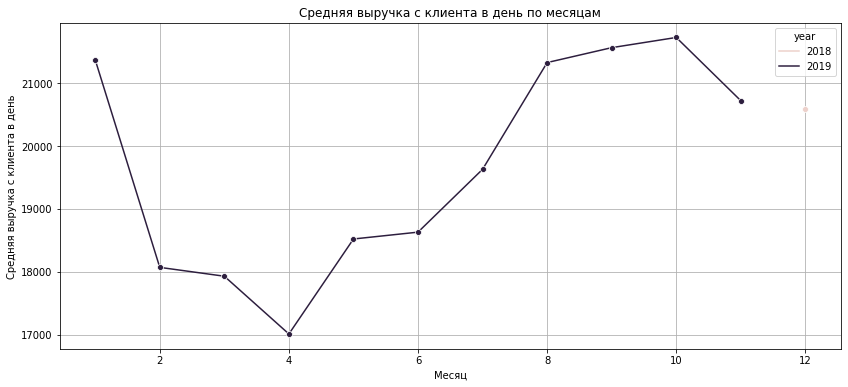

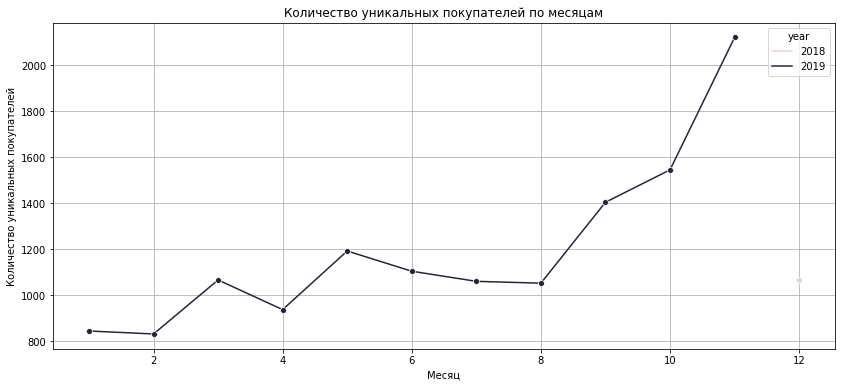

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

# График средней выручки с клиента в день по месяцам
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_avg_revenue, x='month', y='average_revenue_per_customer', hue='year', marker='o')
plt.title('Средняя выручка с клиента в день по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Средняя выручка с клиента в день')
plt.grid(True)
plt.show()

# График количества уникальных покупателей по месяцам
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_avg_revenue, x='month', y='customer_id', hue='year', marker='o', color='green')
plt.title('Количество уникальных покупателей по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество уникальных покупателей')
plt.grid(True)
plt.show()

___Вывод о средней выручки клиента в день по месяцам:___
- Высокие значения: Январь, сентябрь, октябрь и ноябрь 2019 года, что может быть связано с праздничными сезонами и подготовкой к ним.
- Низкие значения: с февраля по апрель 2019 года показывают более низкую среднюю выручку с клиента в день, возможно из-за отсутствия крупных праздников в эти месяцы.

___Вывод о количестве уникальных покупателей по месяцам:___
- явный тренд в 2019 году с пиквм в ноябре: Наблюдаются в январе, сентябре, октябре и ноябре, что может быть связано с праздниками и крупными распродажами.
- Сезонный спад в январе феврале

___Вывод о сезонности выручки клиента:___
- Сезонные пики: Наблюдаются в январе, сентябре, октябре и ноябре, что может быть связано с праздниками и крупными распродажами.
- Сезонные спады: Замечены с февраля по апрель, когда активность снижается.

__Общий вывод__
На основании анализа графиков, можно заключить, что в данных присутствует сезонность.
- Пики активности и роста средней выручки с клиента совпадают с предпраздничными сезонами и крупными распродажами.
- Спады активности наблюдаются в менее активные месяцы, такие как январь и февраль.

3. Рассчитайте стики-фактор за второй и третий квартал 2019 года.

In [146]:
# Фильтрация данных для второго квартала 2019 года (апрель-июнь)
Q2_2019 = analysis_period[(analysis_period['year'] == 2019) & (analysis_period['month'].isin([4, 5, 6]))]

# Фильтрация данных для третьего квартала 2019 года (июль- ентябрь)
Q3_2019 = analysis_period[(analysis_period['year'] == 2019) & (analysis_period['month'].isin([7, 8, 9]))]

проверим правлиность филтрации по кварталам методом describe

In [147]:
Q2_2019['month'].describe()

count    54939.000000
mean         5.068531
std          0.798322
min          4.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          6.000000
Name: month, dtype: float64

In [148]:
Q3_2019['month'].describe()

count    66221.000000
mean         8.070431
std          0.844238
min          7.000000
25%          7.000000
50%          8.000000
75%          9.000000
max          9.000000
Name: month, dtype: float64

In [149]:
# Количество уникальных покупателей во втором квартале 2019 года
unique_customers_Q2 = Q2_2019['customer_id'].nunique()

# Количество уникальных покупателей в третьем квартале 2019 года
unique_customers_Q3 = Q3_2019['customer_id'].nunique()

print(f'Уникальных покупателей во втором квартале 2019: {unique_customers_Q2}')
print(f'Уникальных покупателей в третьем квартале 2019: {unique_customers_Q3}')

Уникальных покупателей во втором квартале 2019: 1852
Уникальных покупателей в третьем квартале 2019: 1989


In [150]:
# Список уникальных покупателей в каждом квартале
customers_Q2 = set(Q2_2019['customer_id'].unique())
customers_Q3 = set(Q3_2019['customer_id'].unique())

# Количество возвращающихся покупателей
returning_customers = len(customers_Q2 & customers_Q3)

print(f'Возвращающихся покупателей: {returning_customers}')

Возвращающихся покупателей: 1096


In [151]:
# Расчет стики-фактора
stickiness_factor = returning_customers / unique_customers_Q3

print(f'Стики-фактор за второй и третий квартал 2019 года: {stickiness_factor:.2f}')

Стики-фактор за второй и третий квартал 2019 года: 0.55


___Это свидетельствует о высокой лояльности клиентов и их склонности возвращаться для повторных покупок.___

4. Составьте профиль каждого клиента, включите в профиль количество заказов, дату первого и последнего заказа, общую сумму всех заказов, среднюю цену заказа, а также другие показатели по вашему выбору.

- профиль каждого клиента включает следующие показатели:
  - Количество заказов (total_orders)

  - Дата первого заказа (first_order_date)

  - Дата последнего заказа (last_order_date)

  - Общая сумма всех заказов (total_spent)

  - Средняя сумма заказа (average_total_cost)
  - Среднее количество товаров в заказе (average_quantity)
  - Средняя цена заказа (average_order_value)




In [152]:
# Группировка данных по клиентам
customer_profile = analysis_period.groupby('customer_id').agg({
    'order_id': 'nunique',  # Количество заказов
    'entry_date': ['min', 'max'],  # Дата первого и последнего заказа
    'total_cost': ['sum', 'mean'],  # Общая сумма всех заказов и средняя сумма заказа
    'quantity': 'mean'  # Среднее количество товаров в заказе
}).reset_index()

# Переименуем столбцы для удобства
customer_profile.columns = ['customer_id', 'total_orders', 'first_order_date', 'last_order_date', 'total_spent', 'average_total_cost', 'average_quantity']

# Рассчитаем среднюю сумму заказа
customer_profile['average_order_value'] = customer_profile['total_spent'] / customer_profile['total_orders']
customer_profile

,customer_id,total_orders,first_order_date,last_order_date,total_spent,average_total_cost,average_quantity,average_order_value
0,-1,1706,2018-12-01 14:32:00,2019-11-30 17:14:00,51626176,687.221969,2.494695,30261.533411
1,1713,2,2019-05-22 10:39:00,2019-10-12 10:23:00,42220,1835.652174,10.608696,21110.000000
2,1717,13,2019-01-06 14:14:00,2019-11-30 12:59:00,131861,252.607280,1.816092,10143.153846
3,1718,1,2019-08-05 13:35:00,2019-08-05 13:35:00,3120,1560.000000,4.000000,3120.000000
4,1719,1,2019-06-12 10:53:00,2019-06-12 10:53:00,4692,938.400000,10.400000,4692.000000
...,...,...,...,...,...,...,...,...
4034,7647,1,2019-05-19 17:47:00,2019-05-19 17:47:00,2930,1465.000000,7.000000,2930.000000
4035,7648,7,2019-02-16 12:33:00,2019-11-03 14:37:00,73399,1668.159091,7.522727,10485.571429
4036,7650,1,2019-02-02 16:01:00,2019-02-02 16:01:00,18640,1694.545455,11.272727,18640.000000
4037,7651,1,2019-11-21 09:51:00,2019-11-21 09:51:00,77977,1813.418605,8.581395,77977.000000


5. Разделите клиентов на возвратных и нет по признаку наличия повторных покупок, для каждой из групп на основе профилей клиентов (когда это возможно) рассчитайте средние показатели и оцените их.

- Возвратные клиенты: Клиенты, совершившие более одного заказа.
- Новые клиенты: Клиенты, совершившие только один заказ.

In [153]:
# Разделение клиентов на возвратных и новых
returning_customers = customer_profile[customer_profile['total_orders'] > 1]
new_customers = customer_profile[customer_profile['total_orders'] == 1]

In [154]:
returning_customers 

,customer_id,total_orders,first_order_date,last_order_date,total_spent,average_total_cost,average_quantity,average_order_value
0,-1,1706,2018-12-01 14:32:00,2019-11-30 17:14:00,51626176,687.221969,2.494695,30261.533411
1,1713,2,2019-05-22 10:39:00,2019-10-12 10:23:00,42220,1835.652174,10.608696,21110.000000
2,1717,13,2019-01-06 14:14:00,2019-11-30 12:59:00,131861,252.607280,1.816092,10143.153846
11,1728,5,2019-04-07 09:35:00,2019-10-25 11:52:00,131816,1856.563380,9.042254,26363.200000
12,1730,2,2019-03-18 12:41:00,2019-11-01 13:57:00,24490,2449.000000,9.800000,12245.000000
...,...,...,...,...,...,...,...,...
4026,7638,9,2019-02-17 10:30:00,2019-11-04 09:07:00,257147,1823.737589,8.375887,28571.888889
4028,7640,3,2019-05-23 09:43:00,2019-10-18 15:22:00,138500,1573.863636,8.727273,46166.666667
4031,7644,2,2019-01-18 09:50:00,2019-04-08 12:33:00,34036,2431.142857,10.285714,17018.000000
4035,7648,7,2019-02-16 12:33:00,2019-11-03 14:37:00,73399,1668.159091,7.522727,10485.571429


In [155]:
returning_customers['total_orders'].describe()

count    2503.000000
mean        6.024371
std        34.670134
min         2.000000
25%         2.000000
50%         4.000000
75%         6.000000
max      1706.000000
Name: total_orders, dtype: float64

In [156]:
new_customers

,customer_id,total_orders,first_order_date,last_order_date,total_spent,average_total_cost,average_quantity,average_order_value
3,1718,1,2019-08-05 13:35:00,2019-08-05 13:35:00,3120,1560.000000,4.000000,3120.0
4,1719,1,2019-06-12 10:53:00,2019-06-12 10:53:00,4692,938.400000,10.400000,4692.0
5,1720,1,2019-03-07 09:52:00,2019-03-07 09:52:00,11300,1883.333333,5.500000,11300.0
6,1722,1,2019-09-27 11:58:00,2019-09-27 11:58:00,12690,2115.000000,6.333333,12690.0
7,1723,1,2019-10-12 15:22:00,2019-10-12 15:22:00,2110,1055.000000,8.000000,2110.0
...,...,...,...,...,...,...,...,...
4032,7645,1,2019-05-09 13:49:00,2019-05-09 13:49:00,16920,2417.142857,6.285714,16920.0
4033,7646,1,2019-04-21 13:11:00,2019-04-21 13:11:00,49750,1604.838710,7.290323,49750.0
4034,7647,1,2019-05-19 17:47:00,2019-05-19 17:47:00,2930,1465.000000,7.000000,2930.0
4036,7650,1,2019-02-02 16:01:00,2019-02-02 16:01:00,18640,1694.545455,11.272727,18640.0


In [157]:
new_customers['total_orders'].describe()

count    1536.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: total_orders, dtype: float64

In [158]:
# Средние показатели для возвратных клиентов
returning_customers_avg = returning_customers.mean()

# Средние показатели для новых клиентов
new_customers_avg = new_customers.mean()

print("Средние показатели для возвратных клиентов:")
print(returning_customers_avg)

print("\nСредние показатели для новых клиентов:")
print(new_customers_avg)

Средние показатели для возвратных клиентов:
customer_id              4690.005593
total_orders                6.024371
total_spent            103204.976029
average_total_cost       1550.863100
average_quantity            7.251183
average_order_value     15419.020862
dtype: float64

Средние показатели для новых клиентов:
customer_id             4681.986328
total_orders               1.000000
total_spent            14482.894531
average_total_cost      1529.690135
average_quantity           7.248415
average_order_value    14482.894531
dtype: float64


/tmp/ipykernel_31/2529238472.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  returning_customers_avg = returning_customers.mean()
/tmp/ipykernel_31/2529238472.py:5: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  new_customers_avg = new_customers.mean()


In [159]:
# Средние показатели для возвратных клиентов
returning_customers_avg = returning_customers.mean(numeric_only=True)

# Средние показатели для новых клиентов
new_customers_avg = new_customers.mean(numeric_only=True)

print("Средние показатели для возвратных клиентов:")
print(returning_customers_avg)

print("\nСредние показатели для новых клиентов:")
print(new_customers_avg)

Средние показатели для возвратных клиентов:
customer_id              4690.005593
total_orders                6.024371
total_spent            103204.976029
average_total_cost       1550.863100
average_quantity            7.251183
average_order_value     15419.020862
dtype: float64

Средние показатели для новых клиентов:
customer_id             4681.986328
total_orders               1.000000
total_spent            14482.894531
average_total_cost      1529.690135
average_quantity           7.248415
average_order_value    14482.894531
dtype: float64


___Выводы по оценке___

- Возвратные клиенты: делают больше заказов, тратят больше денег и заказывают больше товаров. Средний чек заказов также высок, что делает их важной целевой аудиторией.

- Новые клиенты: Новые клиенты имеют меньше заказов и общая сумма заказов у них значительно ниже.

- Общее между клиентами -  средняя стоимость заказа и среднее количество товаров в заказе сопоставимы

- в дальнейшим необходимо выполнить три следующих шага
   - удержание возвратных клиентов
   - привлечение новых клиентов
   - перевод новвых клиентов в картегорию возвртаных

 ___Выводы по шагу 3___
- Цикличность покупательской активности:
  - По часам:
    - Пиковые часы активности: 10:00-15:00, максимум в 12:00
    - Минимальная активность: раннее утро (6:00-7:00) и поздний вечер (18:00-20:00)
   - По дням недели:
     - Самые активные дни: четверг и суббота
   - Наименьшая активность: вторник
- Сезонность:
  - максимум: январь, сентябрь, октябрь и ноябрь 2019 года
  - Спады: февраль-апрель 2019 года
- Высокий стики-фактор

<div class="alert alert-info">
  <b> * <a href="#chapter0">к содержанию</a> </b> 
</div>

---